In [1]:
using JLD, LinearAlgebra, Cuba, SparseArrays, CSV, DataFrames, Plots, BenchmarkTools, Distributed, LaTeXStrings
# Codes for the semi-classical amplitudes
include("/ssd/ri47hud/codes/Spectral Dimension/basic_frusta.jl"),
include("/ssd/ri47hud/codes/Spectral Dimension/laplacians_v3.jl"),
include("/ssd/ri47hud/codes/Spectral Dimension/vertex_ampl.jl"),
include("/ssd/ri47hud/codes/Spectral Dimension/return_prob_v2.jl"),
include("/ssd/ri47hud/codes/Frusta quantum amplitude/quantum_amplitude.jl")

(VAmpSU2, rp3_res, Am81_vector, Expval_P3, QExpval_P1)

Return probability and spectral dimension on finite lattice

In [3]:
taus = [10.0^(i) for i in -3:0.5:7]
rp1_classical = return_probability_1_per_sum(10.0, 10.0, taus, 100)
specdim1_classical = [-2*(log(rp1_classical[t+1]) - log(rp1_classical[t]))/(log(taus[t+1]) - log(taus[t])) for t in 1:(length(taus)-1)]
fig_classical_retprob = plot(taus, rp1_classical, xaxis=:log, yaxis=:log, marker=:circle, markersize=:3.0, legend=false, xlabel=L"$\tau$", ylabel=L"$P$", 
xticks=[10.0^i for i in -10:2:10], yticks=[10.0^i for i in -10:0], xtickfontsize=12, ytickfontsize=12, labelfontsize=16, legendfontsize=10)
fig_classical_specdim = plot(taus[1:(length(taus)-1)], specdim1_classical, xaxis=:log, marker=:circle, markersize=:3.0, markerstrokewidth=:0.5, legend=false, xlabel=L"$\tau$", ylabel=L"$D_S$", 
xticks=[10.0^i for i in -3:2:7], xtickfontsize=12, ytickfontsize=12, labelfontsize=16, legendfontsize=10)
savefig(fig_classical_retprob, "/ssd/ri47hud/codes/Frusta quantum amplitude/figures/classical_retprob_Lfinite")
savefig(fig_classical_specdim, "/ssd/ri47hud/codes/Frusta quantum amplitude/figures/classical_specdim_Lfinite")

"/ssd/ri47hud/codes/Frusta quantum amplitude/figures/classical_specdim_Lfinite.png"

Compare the cases of finite and infinite lattice

In [ ]:
alphs = [i for i in 0.3:0.05:0.7]

In [29]:
taus = [10.0^(i) for i in -2:0.5:4]
file_endings = [Int(10*i) for i in -2:0.5:4]
alphs = [i for i in 0.3:0.02:0.7]
gamma   = 1/3
Lambda  = 0.0
G       = 1.0
dVamp1 = Array{Any}(undef, length(alphs))
Threads.@threads for a in 1:length(alphs)
    dVamp1[a] = Ampl_vector(alphs[a], G, gamma, Lambda, 0.5, 7500.0)
end

In [9]:
#ev1 = zeros(length(alphs),length(taus))
rp1 = [load("/ssd/ri47hud/codes/Spectral Dimension/RP1/Quantum/rp1_1_15000_g13_$tau.jld", "rp1_EPRL")[:,1] for tau in file_endings]

17-element Vector{SparseVector{Float64, Int64}}:
   [30003    ]  =  0.994687
  [30006    ]  =  0.99535
  [30009    ]  =  0.994689
  [30012    ]  =  0.993728
  [30015    ]  =  0.992586
  [30018    ]  =  0.991402
  [30021    ]  =  0.990181
               ⋮
  [224999979]  =  0.999999
  [224999982]  =  0.999999
  [224999985]  =  0.999999
  [224999988]  =  0.999999
  [224999991]  =  0.999999
  [224999994]  =  0.999999
  [224999997]  =  0.999999
  [225000000]  =  0.999999
   [30003    ]  =  0.983307
  [30006    ]  =  0.985392
  [30009    ]  =  0.983337
  [30012    ]  =  0.980262
  [30015    ]  =  0.976788
  [30018    ]  =  0.973136
  [30021    ]  =  0.96939
               ⋮
  [224999979]  =  0.999997
  [224999982]  =  0.999997
  [224999985]  =  0.999997
  [224999988]  =  0.999997
  [224999991]  =  0.999997
  [224999994]  =  0.999997
  [224999997]  =  0.999997
  [225000000]  =  0.999997
   [30003    ]  =  0.948296
  [30006    ]  =  0.954658
  [30009    ]  =  0.948481
  [30012    ]  =  0.93932

In [15]:
ev1 = zeros(length(alphs), length(taus))
for a in 1:length(alphs)
    for t in 1:length(taus)
        ev1[a,t] = dot(rp1[t],dVamp1[a])
        ev1[a,t] *= 1/(sum(dVamp1[a]))
    end
end

In [28]:
alphs = [i for i in 0.3:0.02:0.7]

21-element Vector{Float64}:
 0.3
 0.32
 0.34
 0.36
 0.38
 0.4
 0.42
 0.44
 0.46
 0.48
 ⋮
 0.54
 0.56
 0.58
 0.6
 0.62
 0.64
 0.66
 0.68
 0.7

In [24]:
2*(9-12*alphs[3]-2)

4.399999999999999

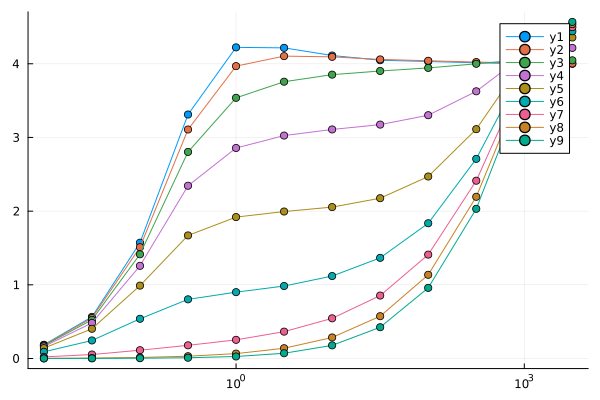

In [18]:
specdim1 = [[-2*(log(ev1[a,t+1]) - log(ev1[a,t]))/(log(taus[t+1]) - log(taus[t])) for t in 1:(length(taus)-1)] for a in 1:length(alphs)]
plot(taus[1:length(taus)-1], [specdim1[a] for a in 1:9], xaxis=:log, marker=:circle)

In [ ]:
rp1_sum = load("/ssd/ri47hud/codes/Spectral Dimension/RP1/Summation/rp1_sum_1_15000_g13_-2_05_4.jld", "rp1_EPRL")
ev1_sum = QExpval_P1(dVamp_g13_semi, transpose(rp1_sum))

In [39]:
fig_ev1_Linf_vs_L100 = scatter(taus, [ev1_int, ev1_sum], xaxis=:log, yaxis=:log, label=["L = inf" "L = 100"], xlabel="\\tau", ylabel="P", fmt=:png)
savefig(fig_ev1_Linf_vs_L100, "figures/ev1_Linf_vs_L100")

"/ssd/ri47hud/codes/Spectral Dimension/figures/ev1_Linf_vs_L100.png"

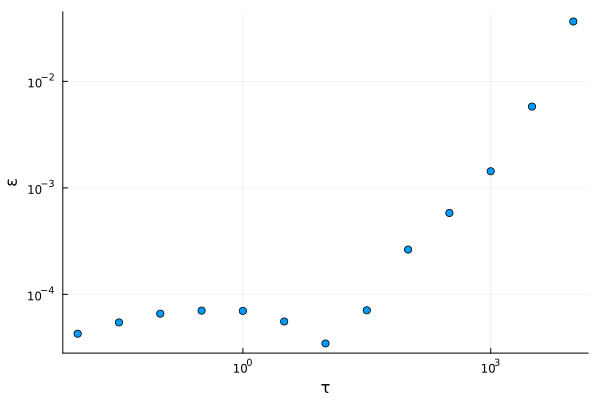

In [45]:
relerr = [abs(ev1_int[t] - ev1_sum[t])/ev1_int[t] for t in 1:13]
fig_relerr_Linf_vs_L100 = scatter(taus, relerr, xaxis=:log,  yaxis=:log, xlabel="\\tau", ylabel="\\epsilon", legend=false, fmt=:png)
#savefig(fig_relerr_Linf_vs_L100, "figures/relerr_Linf_vs_L100")

In [41]:
specdim_int = [-2*(log(ev1_int[t+1]) - log(ev1_int[t])    for t in 1:length(tau_range)
for n in 1:length(nzeros)
    s = nzeros[n]
    tensor[s,t] = 
end
end)/(log(taus[t+1]) - log(taus[t])) for t in 1:12]
specdim_sum = [-2*(log(ev1_sum[t+1]) - log(ev1_sum[t]))/(log(taus[t+1]) - log(taus[t])) for t in 1:12]
fig_specdim1_Linf_vs_L100 = scatter(taus[1:12], [specdim_int, specdim_sum], xaxis=:log, legend=:bottomright, xlabel="\\tau", ylabel="\\ D_S", label=["L = inf" "L = 100"], fmt=:png)
savefig(fig_specdim1_Linf_vs_L100, "figures/specdim1_Linf_vs_L100")

"/ssd/ri47hud/codes/Spectral Dimension/figures/specdim1_Linf_vs_L100.png"

Effects of a cosmological constant

In [21]:
Lambdas = vcat([0.0],[(2*pi)/(lambda^2) for lambda in [7500.0, 750.0, 75.0, 7.5]])
dVamp = [Ampl_resc_tensor(0.5, 1.0, 1/3, Lambda, 7500.0) for Lambda in Lambdas]
ev1 = zeros(length(Lambdas),17)
for L in 1:length(Lambdas)
    for t in 1:17
        ev1[L,t] = QExpval_P1(dVamp[L], rp1[t])[1]
    end
end
specdim1 = [[-2*(log(ev1[L,t+1]) - log(ev1[L,t]))/(log(taus[t+1]) - log(taus[t])) for t in 1:16] for L in 1:length(Lambdas)]
#relerr = [[(specdim1[L][t] - specdim1[1][t])/specdim1[1][t] for t in 1:16] for L in 2:5]

5-element Vector{Vector{Float64}}:
 [0.014918184132485142, 0.046328927970428424, 0.14069719416287588, 0.40317969721404384, 0.9889156080452264, 1.6702905067489986, 1.919441274808256, 1.9948201320512131, 2.054922756981987, 2.1756406168327054, 2.4700056630837577, 3.112819967764172, 4.056457359171924, 4.356996111905368, 4.1246283239674355, 4.041036237669967]
 [0.014920059205670503, 0.046334854613596, 0.14071619140857164, 0.40324347058877225, 0.9891515772889854, 1.6711665187128917, 1.9222799309491454, 2.0037204253176966, 2.0822428994346196, 2.2551104950228034, 2.670457849086578, 3.4506040677810113, 4.197002291839456, 4.252425169280429, 4.090644857670797, 4.035811085790608]
 [0.014958484906608558, 0.04645632695267977, 0.14110548422538882, 0.40454829068380366, 0.9939514089854179, 1.6886522257900969, 1.975970687805975, 2.1506363043863086, 2.401685104731933, 2.622753021246712, 2.6684734028199895, 3.1522763138766408, 4.053557421469549, 4.342853067149242, 4.119909929764812, 4.039501877859409]
 [0

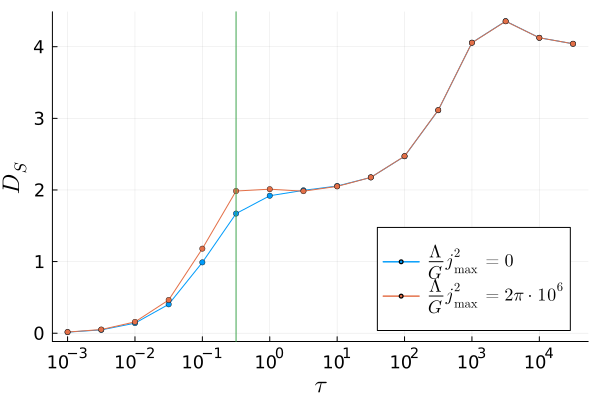

In [108]:
fig_specdim1_Lambda_1 = plot(taus[1:16], [specdim1[1], specdim1[2]], xaxis=:log, legend=:bottomright, marker=:circle, markersize=:3.0, xlabel=L"$\tau$", ylabel=L"$D_S$", fmit=:png, 
label=[L"$\frac{\Lambda}{G}j_{\mathrm{max}}^2 = 0$" L"$\frac{\Lambda}{G}j_{\mathrm{max}}^2 = 2\pi$"], markerstrokewidth=:0.5, xtickfontsize=12, ytickfontsize=12, labelfontsize=16, legendfontsize=12)
vline!([taus[12]], label=false, xticks=[10.0^i for i in -4:5])
fig_specdim1_Lambda_2 = plot(taus[1:16], [specdim1[1], specdim1[3]], xaxis=:log, legend=:bottomright, marker=:circle, markersize=:3.0, xlabel=L"$\tau$", ylabel=L"$D_S$", fmit=:png, 
label=[L"$\frac{\Lambda}{G}j_{\mathrm{max}}^2 = 0$" L"$\frac{\Lambda}{G}j_{\mathrm{max}}^2 = 2\pi\cdot 10^2$"], markerstrokewidth=:0.5, xtickfontsize=12, ytickfontsize=12, labelfontsize=16, legendfontsize=12)
vline!([taus[10]], label=false, xticks=[10.0^i for i in -4:5])
fig_specdim1_Lambda_3 = plot(taus[1:16], [specdim1[1], specdim1[4]], xaxis=:log, legend=:bottomright, marker=:circle, markersize=:3.0, xlabel=L"$\tau$", ylabel=L"$D_S$", fmit=:png, 
label=[L"$\frac{\Lambda}{G}j_{\mathrm{max}}^2 = 0$" L"$\frac{\Lambda}{G}j_{\mathrm{max}}^2 = 2\pi\cdot 10^4$"], markerstrokewidth=:0.5, xtickfontsize=12, ytickfontsize=12, labelfontsize=16, legendfontsize=12)
vline!([taus[8]], label=false, xticks=[10.0^i for i in -4:5])
fig_specdim1_Lambda_4 = plot(taus[1:16], [specdim1[1], specdim1[5]], xaxis=:log, legend=:bottomright, marker=:circle, markersize=:3.0, xlabel=L"$\tau$", ylabel=L"$D_S$", fmit=:png, 
label=[L"$\frac{\Lambda}{G}j_{\mathrm{max}}^2 = 0$" L"$\frac{\Lambda}{G}j_{\mathrm{max}}^2 = 2\pi\cdot 10^6$"], markerstrokewidth=:0.5, xtickfontsize=12, ytickfontsize=12, labelfontsize=16, legendfontsize=12)
vline!([taus[6]], label=false, xticks=[10.0^i for i in -4:5])
#savefig(fig_specdim1_Lambda_1, "/ssd/ri47hud/codes/Spectral Dimension/figures/specdim1_Lambda1")
#savefig(fig_specdim1_Lambda_2, "/ssd/ri47hud/codes/Spectral Dimension/figures/specdim1_Lambda2")
#savefig(fig_specdim1_Lambda_3, "/ssd/ri47hud/codes/Spectral Dimension/figures/specdim1_Lambda3")
#savefig(fig_specdim1_Lambda_4, "/ssd/ri47hud/codes/Spectral Dimension/figures/specdim1_Lambda4")

Effective scaling of amplitudes

In [105]:
#spins = [0.5*j for j in 1:15000 if EPRL_cond(0.5*j, 1//3) == 1]
dVamp_diag = [[j^3 * Ampl_cont(0.5, 1.0, 1/3, Lambda, j,j,j) for j in 0.5:0.1:7500] for Lambda in Lambdas]
js = [i for i in 0.5:0.1:7500]
firstosc = [maximum(findall(x -> x < sqrt((2*pi)/Lambda), 0.5:0.1:7500)) for Lambda in Lambdas]
fig_dVamp_Lambda = plot([0.075,100000.0], [0.047185920000000006, 0.047185920000000006], label= L"$\frac{\Lambda}{G}j_{\mathrm{max}}^2 = 0$", linewidth=1.5)
plot!([dVamp_diag[L][1:firstosc[L]] for L in 2:5], xaxis=:log, legend=:bottomleft, label=[L"$\frac{\Lambda}{G}j_{\mathrm{max}}^2 = 2\pi$" L"$\frac{\Lambda}{G}j_{\mathrm{max}}^2 = 2\pi\cdot 10^2$" L"$\frac{\Lambda}{G}j_{\mathrm{max}}^2 = 2\pi\cdot 10^4 $" L"$\frac{\Lambda}{G}j_{\mathrm{max}}^2 = 2\pi \cdot 10^6 $"], 
linewidth=1.5, ylabel=L"$\lambda^3\cdot\mathcal{A}$", xlabel=L"$\lambda$", xlims=(0.075,100000), xticks=([findall(x -> x == 7500/10^n, js)[1] for n in 0:3], ["7500", "750", "75", "7.5"])
, xtickfontsize=12, ytickfontsize=12, labelfontsize=16, legendfontsize=12)
hline!([0.0], ls=:dash, lc=:black, label=false)
savefig(fig_dVamp_Lambda, "/ssd/ri47hud/codes/Spectral Dimension/figures/dVamp_Lambda")

"/ssd/ri47hud/codes/Spectral Dimension/figures/dVamp_Lambda.png"

Scaling, plotted for the first complete oscillation.  However, I think that the most relevant part is the first positive part of the first oscillation.

In [54]:
scaling = [[-((log(abs(Ampl_cont(0.5, 1.0, 1/3, Lambda, js[ind+1],js[ind+1],js[ind+1]))) - log(abs(Ampl_cont(0.5, 1.0, 1/3, Lambda, js[ind],js[ind],js[ind]))))/
(log(js[ind+1]) - log(js[ind]))) for ind in 1:(length(js)-1)] for Lambda in Lambdas]
#firsthalfosc = [maximum(findall(x -> x < sqrt((2pi)/Lambda), 0.5:0.1:7500)) for Lambda in Lambdas]
#fig_dVamp_scaling_Lambda = plot([1.5,75000.0],[-3.0, -3.0], linewidth=1.5, label=L"$\frac{\Lambda}{G}j_{\mathrm{max}}^2 = 0$")
#plot!([scaling[L][1:(firstosc[L])] for L in 4:4], xaxis=:log, xticks=([findall(x -> x == 7500/10^n, js)[1] for n in 0:3], [7500/10^n for n in 0:3]), ylims=(-6,0), linewidth=1.5, legend=:topleft,label=[L"$\frac{\Lambda}{G}j_{\mathrm{max}}^2 = 2\pi$" L"$\frac{\Lambda}{G}j_{\mathrm{max}}^2 = 2\pi\cdot 10^2$" L"$\frac{\Lambda}{G}j_{\mathrm{max}}^2 = 2\pi\cdot 10^4 $" L"$\frac{\Lambda}{G}j_{\mathrm{max}}^2 = 2\pi \cdot 10^6 $"]
#, xlabel=L"$\lambda$", ylabel=L"$\partial\log\vert\mathcal{A}\vert/\partial\log\lambda$")
#savefig(fig_dVamp_scaling_Lambda, "/ssd/ri47hud/codes/Spectral Dimension/figures/dVamp_scaling_Lambda")

5-element Vector{Vector{Float64}}:
 [2.9999999999999987, 3.0000000000000058, 2.9999999999999933, 3.000000000000006, 2.9999999999999973, 2.9999999999999947, 3.000000000000006, 2.999999999999997, 3.000000000000011, 2.9999999999999942  …  3.00000000013321, 2.9999999997335767, 3.0, 3.000000000133215, 2.999999999733566, 3.0, 3.0000000001332205, 2.9999999997335554, 3.0, 3.0000000003996776]
 [2.9999999999999982, 3.0000000000000084, 2.9999999999999982, 3.0000000000000138, 3.00000000000001, 3.0000000000000133, 3.0000000000000213, 3.00000000000003, 3.0000000000000533, 3.0000000000000586  …  2.9891514399069896, 2.9902930701311843, 2.99143477702901, 2.992576560338626, 2.993718418597169, 2.9948603538020397, 2.99600236462472, 2.997144451200468, 2.998286614462372, 2.9994288541467435]
 [3.0000000000124554, 3.0000000000242673, 3.0000000000429585, 3.0000000000708407, 3.000000000110471, 3.0000000001648073, 3.000000000237088, 3.0000000003308833, 3.000000000450105, 3.000000000598946  …  -105.77483855657981

Scaling, plotted for the first positive part of the oscillation

In [104]:
shift = real(D(3.0, 3.0, 3.0))/abs(D(3.0,3.0,3.0))
acos(shift)
zero_points = [sqrt((acos(shift))/Lambdas[L]) for L in 2:5]
firstpososc = [maximum(findall(x -> x < zero_points[L], 0.5:0.1:7500)) for L in 1:4]
fig_dVamp_scaling_Lambda = plot([0.075,100000.0],[3.0, 3.0], linewidth=1.5, label=L"$\frac{\Lambda}{G}j_{\mathrm{max}}^2 = 0$", ylabel=L"$\gamma$")
plot!([scaling[L+1][1:(firstpososc[L]-1)] for L in 1:4], xaxis=:log, xlims=(0.075,100000), xticks=([findall(x -> x == 7500/10^n, js)[1] for n in 0:3], ["7500", "750", "75", "7.5"]), ylims=(2.5,20), yticks= [3*i for i in 0:10], linewidth=1.5, legend=:topleft, label=[L"$\frac{\Lambda}{G}j_{\mathrm{max}}^2 = 2\pi$" L"$\frac{\Lambda}{G}j_{\mathrm{max}}^2 = 2\pi\cdot 10^2$" L"$\frac{\Lambda}{G}j_{\mathrm{max}}^2 = 2\pi\cdot 10^4 $" L"$\frac{\Lambda}{G}j_{\mathrm{max}}^2 = 2\pi \cdot 10^6 $"]
, xlabel=L"$\lambda$", xtickfontsize=12, ytickfontsize=12, labelfontsize=16, legendfontsize=12)
savefig(fig_dVamp_scaling_Lambda, "/ssd/ri47hud/codes/Spectral Dimension/figures/dVamp_scaling_Lambda")

"/ssd/ri47hud/codes/Spectral Dimension/figures/dVamp_scaling_Lambda.png"

Checking, if the behavior is jmax dependent. It's not about the relation with jmax and Lambda, but really the occurence of the oscillation.

In [ ]:
Lambdas = [0.0, pi/(7.5^2)]
spins = [0.5*j for j in 1:15000 if EPRL_cond(0.5*j, 1//3) == 1]
dVamp_7500 = [Ampl_resc_tensor(0.5, 1.0, 1/3, Lambda, 7500.0) for Lambda in Lambdas]
dVamp_5000 = [Ampl_resc_tensor(0.5, 1.0, 1/3, Lambda, 5000.0) for Lambda in Lambdas]
dVamp_2500 = [Ampl_resc_tensor(0.5, 1.0, 1/3, Lambda, 2500.0) for Lambda in Lambdas]
dVamp_750  = [Ampl_resc_tensor(0.5, 1.0, 1/3, Lambda, 750.0) for Lambda in Lambdas]

In [ ]:
rp1_7500 = rp1
rp1_5000 = [rp1_res([taus[t]], rp1[t], 1/3, 0.5, 7500.0, 0.5, 5000.0) for t in 1:length(taus)]
rp1_2500 = [rp1_res([taus[t]], rp1[t], 1/3, 0.5, 7500.0, 0.5, 2500.0) for t in 1:length(taus)]
rp1_750  = [rp1_res([taus[t]], rp1[t], 1/3, 0.5, 7500.0, 0.5, 750.0) for t in 1:length(taus)]

In [17]:
ev1_7500 = zeros(length(Lambdas), length(taus))
ev1_5000 = zeros(length(Lambdas), length(taus))
ev1_2500 = zeros(length(Lambdas), length(taus))
ev1_750  = zeros(length(Lambdas), length(taus))
for L in 1:length(Lambdas)
    for t in 1:length(taus)
        ev1_7500[L,t] = QExpval_P1(dVamp_7500[L], rp1_7500[t])[1]
        ev1_5000[L,t] = QExpval_P1(dVamp_5000[L], rp1_5000[t])[1]
        ev1_2500[L,t] = QExpval_P1(dVamp_2500[L], rp1_2500[t])[1]
        ev1_750[L,t]  = QExpval_P1(dVamp_750[L], rp1_750[t])[1]
    end
end

In [37]:
specdim1_7500 = [[-2*(log(ev1_7500[L,t+1]) - log(ev1_7500[L,t]))/(log(taus[t+1]) - log(taus[t])) for t in 1:(length(taus)-1)] for L in 1:2]
specdim1_5000 = [[-2*(log(ev1_5000[L,t+1]) - log(ev1_5000[L,t]))/(log(taus[t+1]) - log(taus[t])) for t in 1:(length(taus)-1)] for L in 1:2]
specdim1_2500 = [[-2*(log(ev1_2500[L,t+1]) - log(ev1_2500[L,t]))/(log(taus[t+1]) - log(taus[t])) for t in 1:(length(taus)-1)] for L in 1:2]
specdim1_750 = [[-2*(log(ev1_750[L,t+1]) - log(ev1_750[L,t]))/(log(taus[t+1]) - log(taus[t])) for t in 1:(length(taus)-1)] for L in 1:2]
specdims = vcat(specdim1_7500, [specdim1_5000[2]], [specdim1_2500[2]], [specdim1_750[2]])
fig_Lambda_test = plot(taus[1:16], [specdims[ind] for ind in 1:5], xaxis=:log, marker=:circle, legend=:bottomright, ylims=(-0.2,4.5))
vline!([10.0^(-0.5)])
savefig(fig_Lambda_test, "/ssd/ri47hud/codes/Spectral Dimension/figures/Lambda_test")

"/ssd/ri47hud/codes/Spectral Dimension/figures/Lambda_test.png"

Observing, that the first oscillation is the most relevant one

"/ssd/ri47hud/codes/Spectral Dimension/figures/specdim1_Lambda4.png"

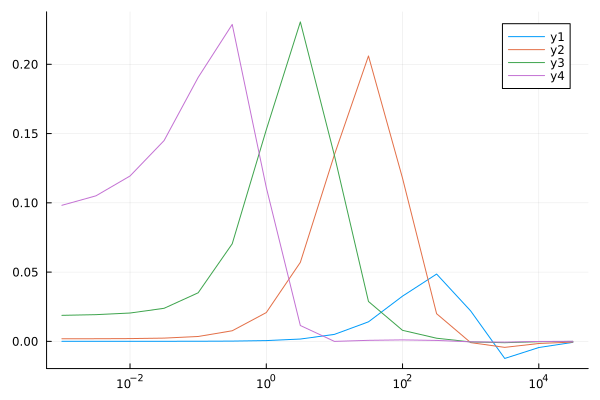

In [38]:

plot(taus[1:16], [relerr[L] for L in 1:4], xaxis=:log)
#vline!([taus[argmax(relerr[L])] for L in 1:4])

The maxima are in perfect linear distance. This means that the effect of the very first oscillation is decisive for the behavior of the spectral dimension. As already anticipated, for fast oscillations, the effects wear of at large tau since they average out (like in a stationary phase approximation).

In [ ]:
Lambdas = [(pi*n)/(7500^2) for n in 0:4]
dVamp_Lambda = [Ampl_resc_tensor(0.5, 1.0, 1/3, Lambda, 7500.0) for Lambda in Lambdas]

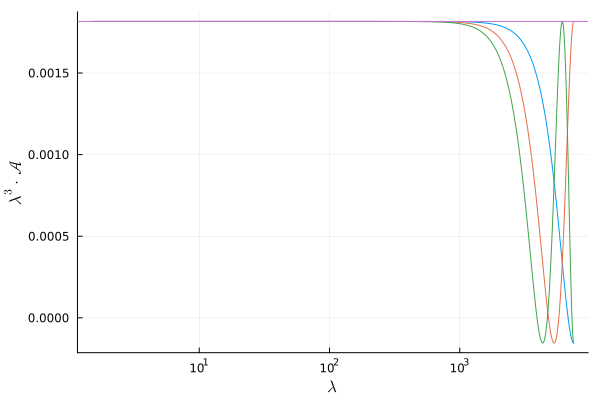

In [209]:
ns = [i for i in 1:15000 if EPRL_cond(0.5*i, 1//3) == 1]
plot(ns.*0.5, [[((0.5*ns[i])^3) * dVamp_Lambda[L][ns[i],ns[i]] for i in 1:length(ns)] for L in 2:4], xlabel=L"$\lambda$", ylabel=L"$\lambda^3\cdot \mathcal{A}$", legend=false, xaxis=:log)
hline!([0.0018158985951435137])

In [ ]:
taus = [10.0^(i) for i in -3:0.5:5]
file_endings = [Int(10*i) for i in -3:0.5:5]
rp1 = [load("/ssd/ri47hud/codes/Spectral Dimension/RP1/Quantum/rp1_1_15000_g13_$tau.jld", "rp1_EPRL") for tau in file_endings]

Comnparing summation and integration of spins

In [ ]:
dVamp_semi_sum = Ampl_resc_tensor(0.5, 1.0, 1/3, 0.0, 7500.0)
taus = [10.0^(i) for i in -3:0.5:5]
file_endings = [Int(10*i) for i in -3:0.5:5]
ev1_semi_sum = zeros(17)
for (t, tau) in enumerate(file_endings)
    rp1 = load("/ssd/ri47hud/codes/Spectral Dimension/RP1/Quantum/rp1_1_15000_g13_$tau.jld", "rp1_EPRL")
    ev1_semi_sum[t] = QExpval_P1(dVamp_semi_sum, rp1)[1]
end
ev1_semi_int1 = load("/ssd/ri47hud/codes/Spectral Dimension/RP1/1e5/ev1_int_1_15000_g13_1.jld", "ev1_int")
ev1_semi_int2 = load("/ssd/ri47hud/codes/Spectral Dimension/RP1/1e5/ev1_int_1_15000_g13_2.jld", "ev1_int")
ev1_semi_int = vcat(ev1_semi_int1, ev1_semi_int2)

In [6]:
#scatter(taus, [ev1_semi_sum, ev1_semi_int], xaxis=:log, yaxis=:log, label=["summation" "integration"], xlabel=L"$\tau$", ylabel=L"$P$")
specdim1_sum = [-2*(log(ev1_semi_sum[t+1]) - log(ev1_semi_sum[t]))/(log(taus[t+1]) - log(taus[t])) for t in 1:16]
specdim1_int = [-2*(log(ev1_semi_int[t+1]) - log(ev1_semi_int[t]))/(log(taus[t+1]) - log(taus[t])) for t in 1:16]
fig_specdim1_sum_vs_int = plot(taus[1:16], [specdim1_sum, specdim1_int], label=["summation" "integration"], xaxis=:log, xlabel=L"$\tau$", ylabel=L"$D_S$", legend=:bottomright, 
marker=:circle, markersize=:3.0, markerstrokewidth=:0.5, xtickfontsize=12, ytickfontsize=12, labelfontsize=16, legendfontsize=10)
savefig(fig_specdim1_sum_vs_int, "/ssd/ri47hud/codes/Frusta quantum amplitude/figures/specdim1_sum_vs_int")

"/ssd/ri47hud/codes/Frusta quantum amplitude/figures/specdim1_sum_vs_int.png"

For given tau, which spins of the return probability are emphasized?

In [ ]:
N = 15000
A_i = findall(x -> EPRL_cond(x, 1//3) == 1, [0.5*i for i in 1:N])
nzeros_diag = vec([1+a_0 + a_0*N for a_0 in A_i.-1])
rp1_diag = [[rp1[t][d,1] for d in nzeros_diag] for t in 1:17]

In [82]:
taus[11]

100.0

In [ ]:
[spins[maximum(findall(x-> (1-x) > 0.005, rp1_diag[t]))] for t in 1:17]

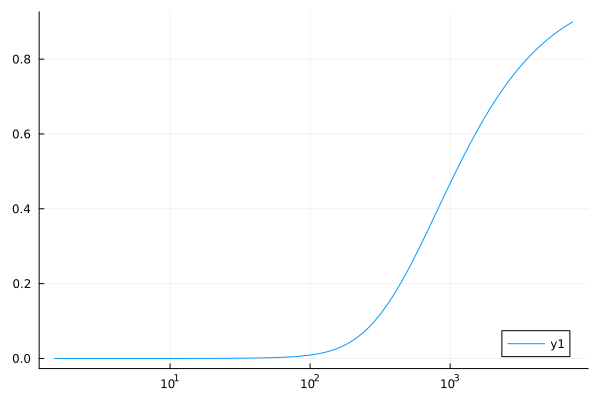

In [84]:
spins = [0.5*i for i in 1:15000 if EPRL_cond(0.5*i, 1//3) == 1]
plot(spins, rp1_diag[11], xaxis=:log)

When is an intermediate regime observable?

In [33]:
taus = [10.0^(i) for i in -2:0.5:2]
jmin = 0.5
gamma = 1/3
rp1_1_20 = rp1vec_EPRL(taus, jmin, 20/2, gamma)
rp1_1_200 = rp1vec_EPRL(taus, jmin, 400/2, gamma)
#rp1_1_2000 = rp1vec_EPRL(taus, jmin, 2000/2, gamma)

9×160000 SparseMatrixCSC{Float64, Int64} with 159201 stored entries:
⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛

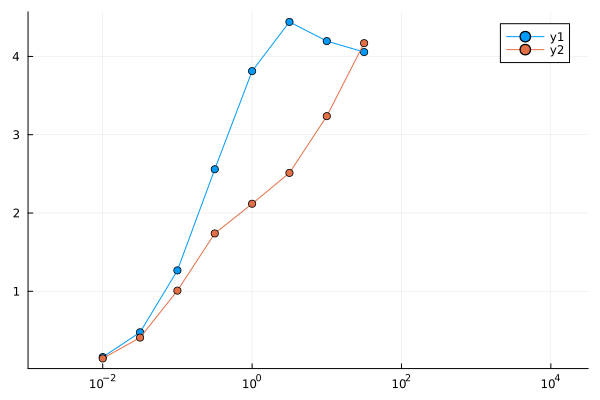

In [34]:
dVamp_1_20 = Ampl_vector(0.5, 1.0, gamma, 0.0, jmin, 20/2)
dVamp_1_200 = Ampl_vector(0.5, 1.0, gamma, 0.0, jmin, 400/2)
ev1_1_20 = QExpval_P1(dVamp_1_20, transpose(rp1_1_20))
ev1_1_200 = QExpval_P1(dVamp_1_200, transpose(rp1_1_200))
specdim1_1_20 = [-2*(log(ev1_1_20[t+1]) - log(ev1_1_20[t]))/(log(taus[t+1]) - log(taus[t])) for t in 1:8]
specdim1_1_200 = [-2*(log(ev1_1_200[t+1]) - log(ev1_1_200[t]))/(log(taus[t+1]) - log(taus[t])) for t in 1:8]
plot(taus[1:8], [specdim1_1_20, specdim1_1_200], xaxis=:log, xlims = (10.0^(-3), 10.0^(4.5)), marker=:circle)

In [4]:
@btime return_probability_1_per(0.5,0.5,10.0)

  1.955 ms (80008 allocations: 2.44 MiB)


1.6054707396419293e-5

In [25]:
taus = [10.0^i for i in -3:0.5:4]
spins = [0.5*i for i in 1:2000]
rp1_scaling = [return_probability_1_per(j,j,tau) for tau in taus, j in spins]
rp1_scaling_hom = [return_probability_1_per(10.0*j, 10.0*j, 10.0*tau) for tau in taus, j in spins]
#CSV.write("ret_prob_mathematica.csv", DataFrame(rp1_scaling, :auto), header = false)

15×2000 Matrix{Float64}:
 0.984156     0.992042     0.994687     …  0.999992     0.999992
 0.950879     0.975111     0.983307        0.999975     0.999975
 0.853557     0.923544     0.948296        0.99992      0.99992
 0.612689     0.779642     0.846353        0.999747     0.999747
 0.236575     0.467658     0.597205        0.999201     0.999201
 0.0274349    0.117735     0.220771     …  0.997475     0.997476
 0.00183502   0.00905916   0.0242065       0.992038     0.992042
 0.000164929  0.000690219  0.00163678      0.975099     0.975111
 1.60547e-5   6.50076e-5   0.000148105     0.923507     0.923544
 1.57866e-6   6.39175e-6   1.44206e-5      0.779546     0.779642
 1.56219e-7   6.30544e-7   1.4273e-6    …  0.467489     0.467658
 1.55949e-8   6.26271e-8   1.40793e-7      0.117631     0.117735
 1.56435e-9   6.25158e-9   1.40232e-8      0.00904821   0.00905916
 1.56534e-10  6.25538e-10  1.40714e-9      0.000689495  0.000690219
 1.56372e-11  6.26241e-11  1.40868e-10     6.49414e-5   6.500

In [32]:
relerr = [abs(rp1_scaling[10,i]-rp1_scaling_hom[10,i])/rp1_scaling[10,i] for i in 1:length(rp1_scaling[10,:])]

2000-element Vector{Float64}:
 8.048262208772544e-16
 0.0
 5.403886074842099e-15
 2.635893243890965e-15
 0.0
 2.3207503588865686e-16
 0.0
 1.0352985187858146e-15
 8.159873344364991e-16
 1.6434385021281302e-15
 ⋮
 1.7105024735399652e-15
 5.700971480662318e-16
 3.135147856600129e-15
 1.1399133918131958e-15
 2.9919045796623832e-15
 0.0
 5.697466009012013e-16
 0.0
 1.4240173122200868e-15

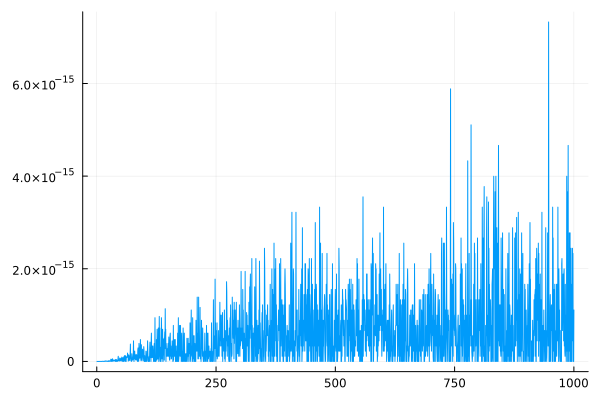

In [31]:
plot(spins, abs.(rp1_scaling[10,:] .- rp1_scaling_hom[10,:]),legend=false)